In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz
import pydotplus

In [2]:
data = []
labels = ['100', '200', '400', '800']

for l in labels:
    data.append(pd.read_csv(f'final_results/results{l}/data_full.csv'))

In [3]:
data[0].tail()

,Cell0,Cell1,Cell2,Cell3,Cell4,Cell5,Cell6,Cell7,Cell8,Player,Move
220995,2,0,2,0,1,0,0,0,0,1,1
220996,0,0,0,0,2,0,0,0,0,1,0
220997,1,0,2,0,2,0,1,0,0,2,3
220998,0,0,0,0,2,0,0,0,0,1,0
220999,1,2,0,0,2,0,0,1,0,2,3


In [4]:
X = []
y = []

for d in data:
    X.append(d.drop(['Move'], axis=1))
    y.append(d['Move'])

In [5]:
models = []

for Xi, yi in zip(X, y):
    clf = tree.DecisionTreeClassifier()
    clf.fit(Xi, yi)
    models.append(clf)

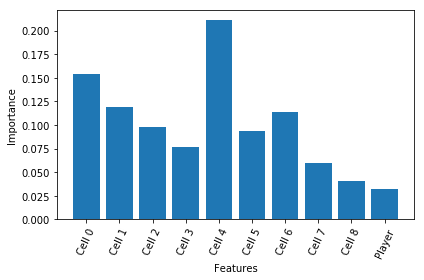

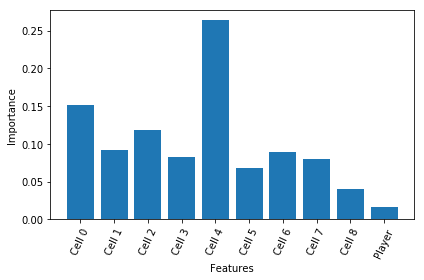

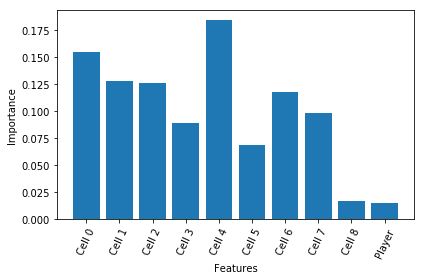

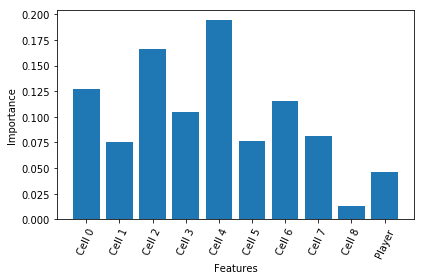

In [7]:
idx = range(1,11)
features = ['Cell 0', 'Cell 1', 'Cell 2', 'Cell 3', 'Cell 4', 'Cell 5', 'Cell 6', 'Cell 7', 'Cell 8', 'Player']

for i in range(len(models)):
    fig, ax = plt.subplots()#figsize=(10,4)
    ax.bar(idx, models[i].feature_importances_)
    ax.set_xticks(idx)
    ax.set_xticklabels(features, rotation=65)
    ax.set_xlabel('Features')
    ax.set_ylabel('Importance')
    fig.tight_layout()
    #plt.show()
    fig.savefig(f'images/features{labels[i]}.png')

In [12]:
dot_data = tree.export_graphviz(models[1], out_file=None,
                               feature_names=features,
                               class_names=['Move_0', 'Move_1', 'Move_2', 'Move_3', 'Move_4',
                                            'Move_5', 'Move_6', 'Move_7', 'Move_8'],
                               filled=True, rounded=True,
                               special_characters=True)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('images/original_tree.png')
#graph = graphviz.Source(dot_data)
#graph.render("images/Tree_graph.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.155231 to fit



True